# Ćwiczenia 5: Detekcja i klasyfikacja obrazów z wykorzystaniem YOLO v11 i Roboflow

### Importowanie bibliotek i instalacja zależności

In [ ]:
!pip install ultralytics roboflow matplotlib opencv-python

### Importowanie YOLOv11 i ustawienie modelu

In [ ]:
from ultralytics import YOLO

# Wczytanie najnowszego modelu YOLOv11
model = YOLO('yolo11n.pt')

### Przykładowe predykcje

--2024-11-15 19:00:08--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>] 103.57K  --.-KB/s    in 0.002s  

2024-11-15 19:00:08 (59.0 MB/s) - ‘example.jpg’ saved [106055/106055]


image 1/1 /content/example.jpg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 398.8ms
Speed: 3.7ms preprocess, 398.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


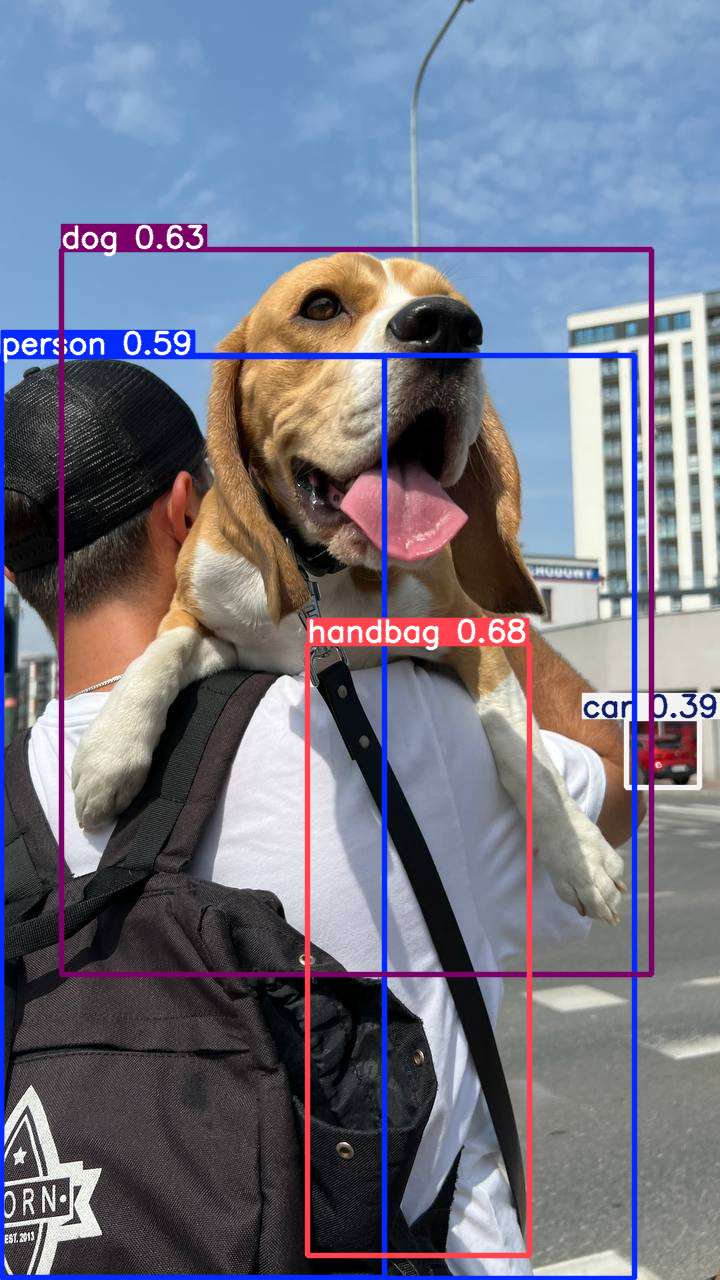

In [ ]:
# Pobranie przykładowego obrazu
image_url = 'https://media.roboflow.com/notebooks/examples/dog.jpeg'
!wget {image_url} -O example.jpg

# Wykonanie predykcji
results = model.predict('example.jpg')
results[0].show()

### Detekcja obiektów z kamery

In [ ]:
import cv2
from ultralytics import YOLO

# Wczytaj model YOLO
model = YOLO('yolo11n.pt')

# Otwórz kamerę (indeks '0' oznacza domyślną kamerę)
cap = cv2.VideoCapture(0)

# Sprawdzenie, czy kamera została poprawnie otwarta
if not cap.isOpened():
    print("Nie udało się otworzyć kamery.")
    exit()

while True:
    # Pobierz klatkę z kamery
    ret, frame = cap.read()
    if not ret:
        print("Nie udało się pobrać obrazu z kamery.")
        break

    # Wykonaj predykcję na aktualnej klatce
    results = model.predict(frame)

    # Renderowanie detekcji na obrazie
    annotated_frame = results[0].plot()

    # Wyświetlanie obrazu z detekcjami
    cv2.imshow('YOLOv11 Detection', annotated_frame)

    # Zamknij okno po wciśnięciu klawisza 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Zwolnij zasoby i zamknij okna
cap.release()
cv2.destroyAllWindows()


Nie udało się otworzyć kamery.
Nie udało się pobrać obrazu z kamery.


Wersja z video

In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  37601      0 --:--:-- --:--:-- --:--:-- 37783


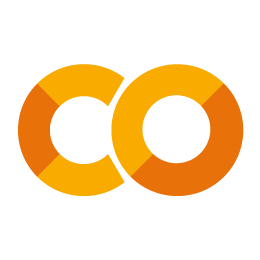

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
!pip install ultralytics
import time
import cv2
from ultralytics import YOLO


0: 384x640 5 persons, 2 cars, 1 skateboard, 152.9ms
Speed: 4.9ms preprocess, 152.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


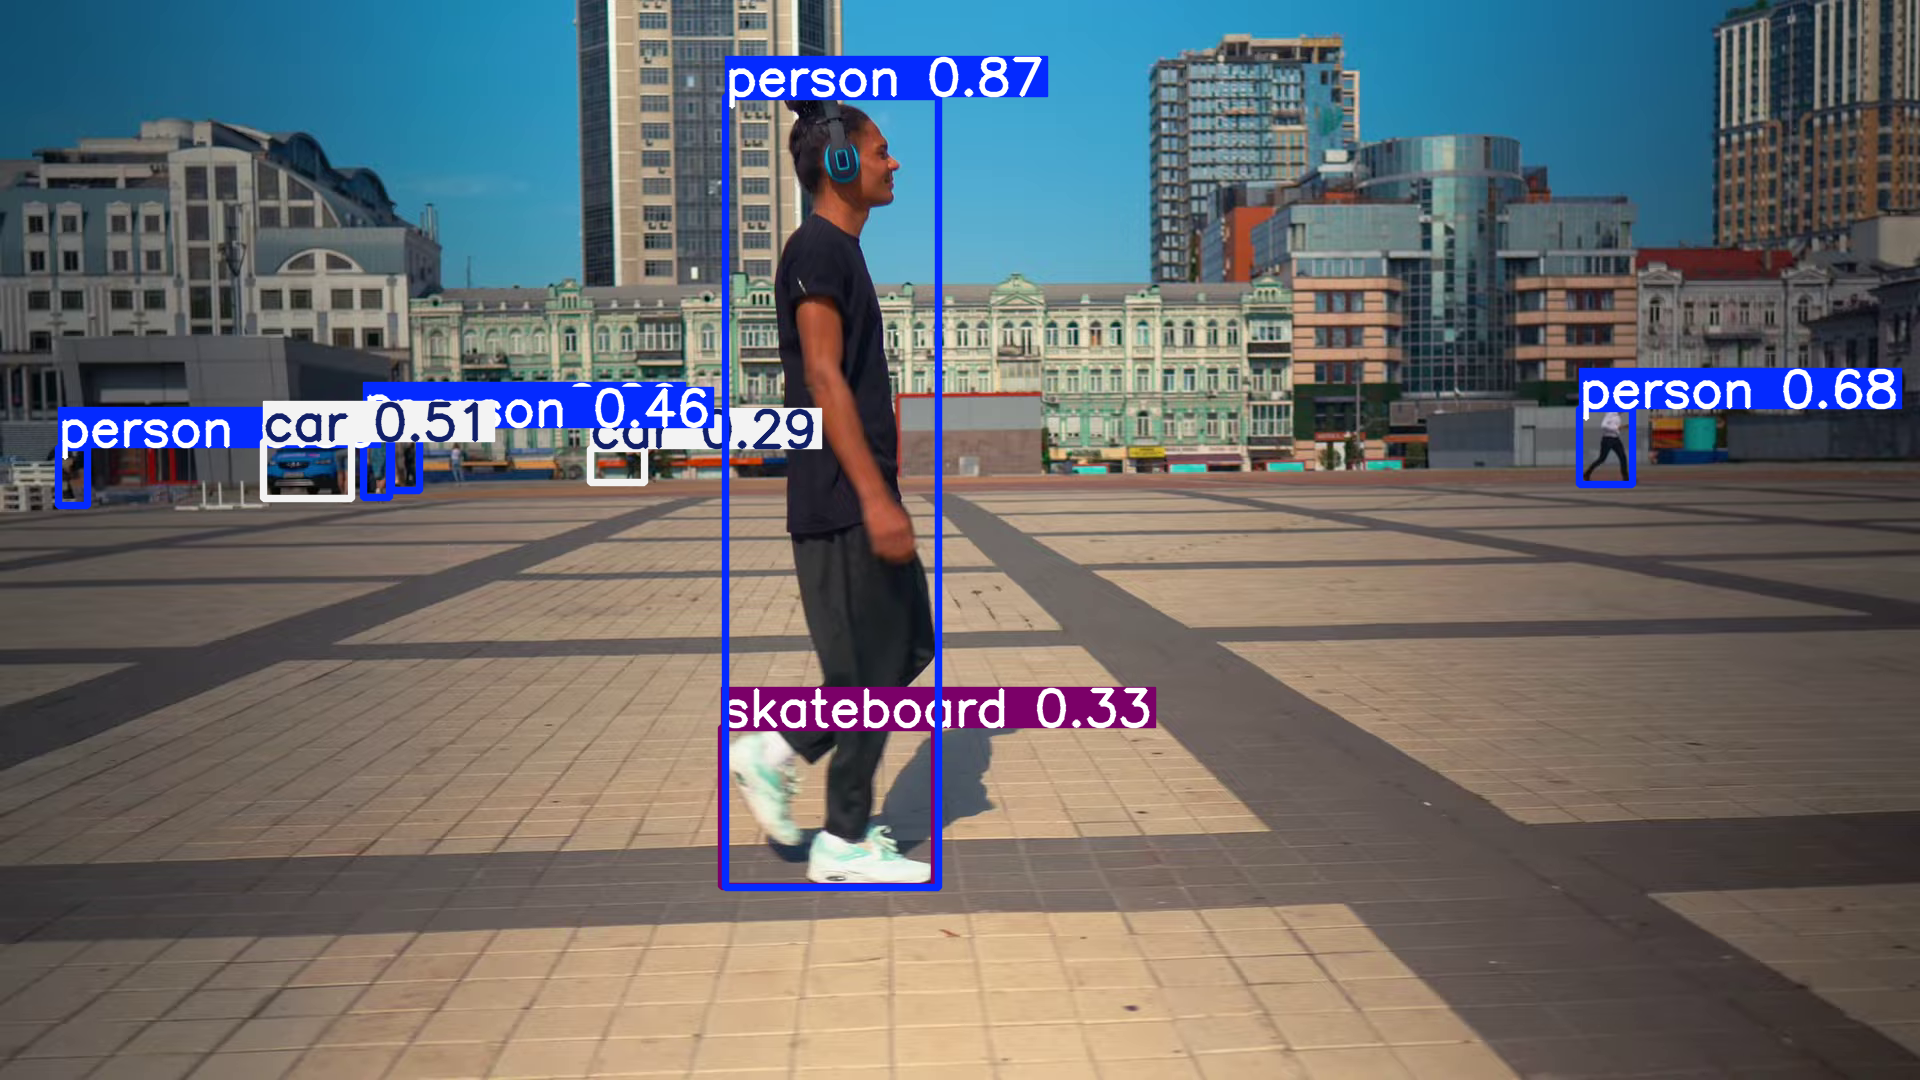


0: 384x640 5 persons, 2 cars, 221.6ms
Speed: 5.5ms preprocess, 221.6ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


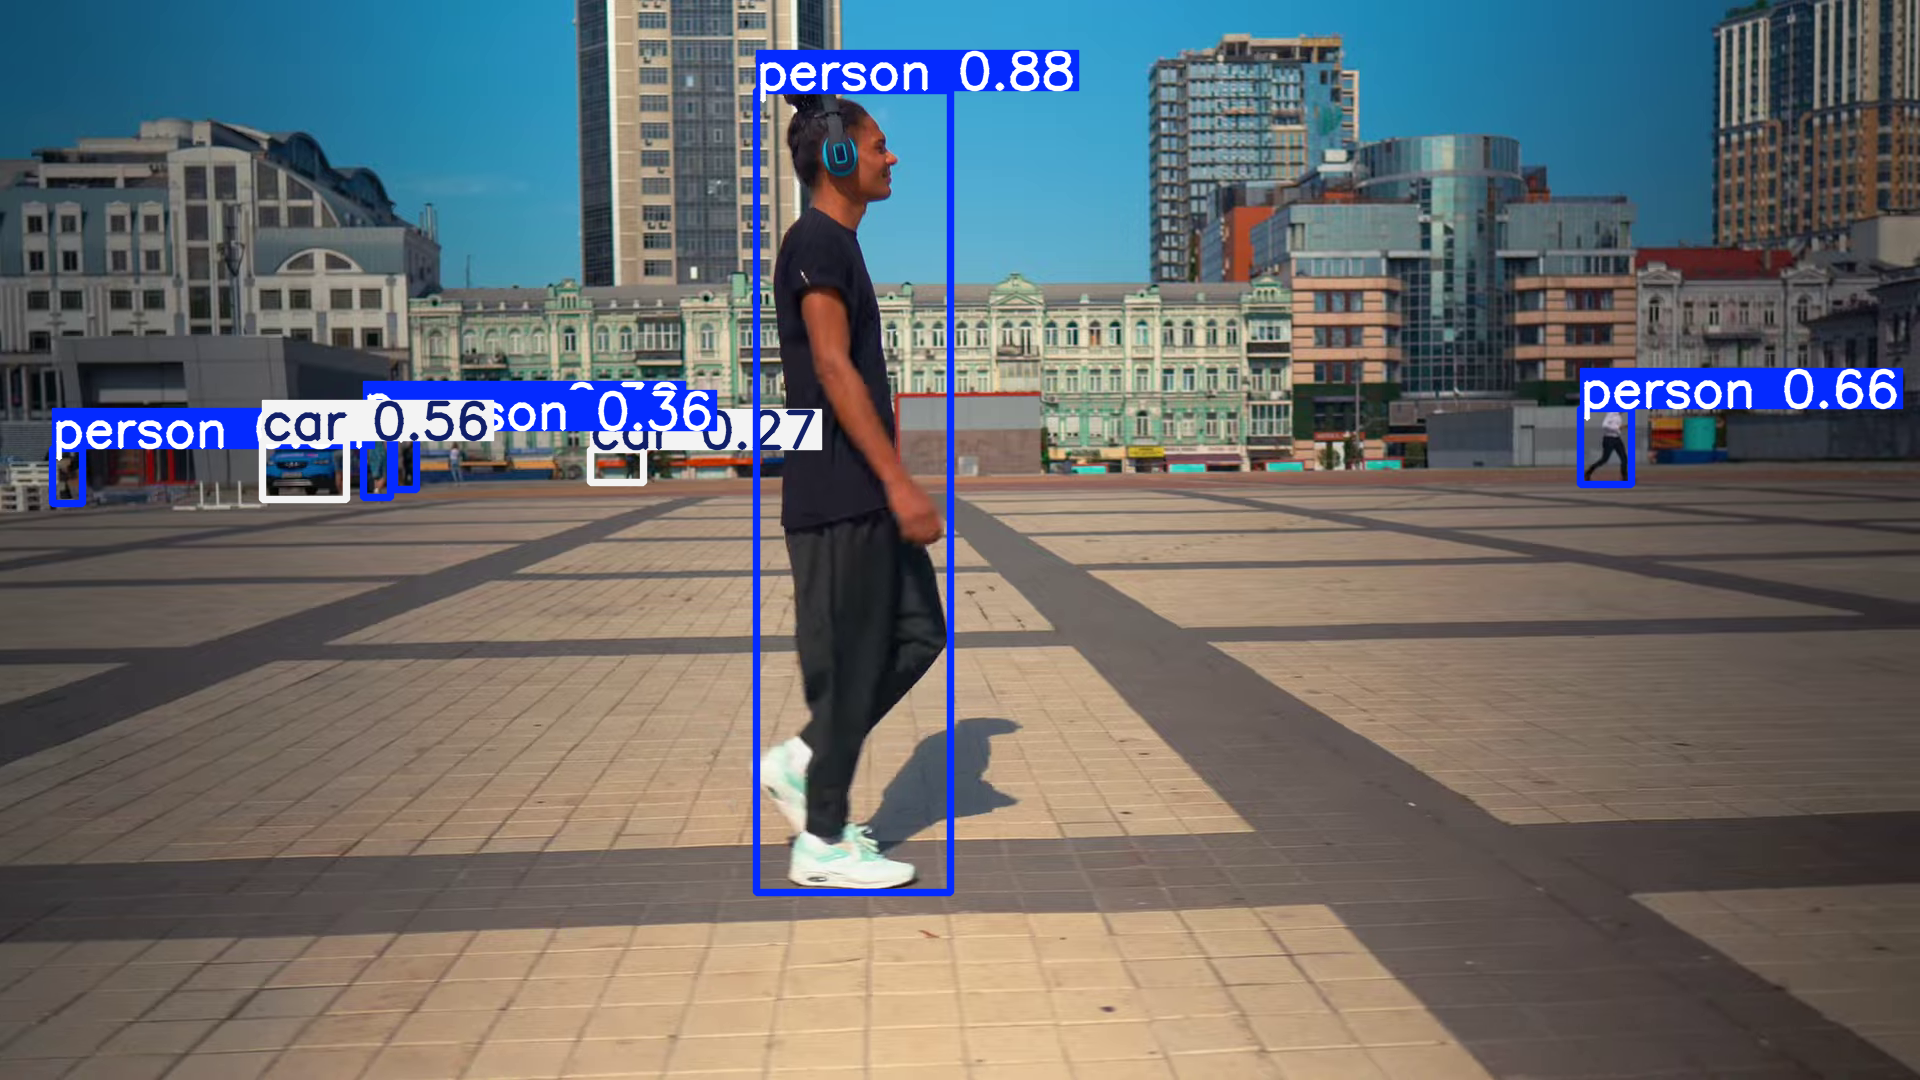


0: 384x640 5 persons, 1 car, 283.6ms
Speed: 5.5ms preprocess, 283.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


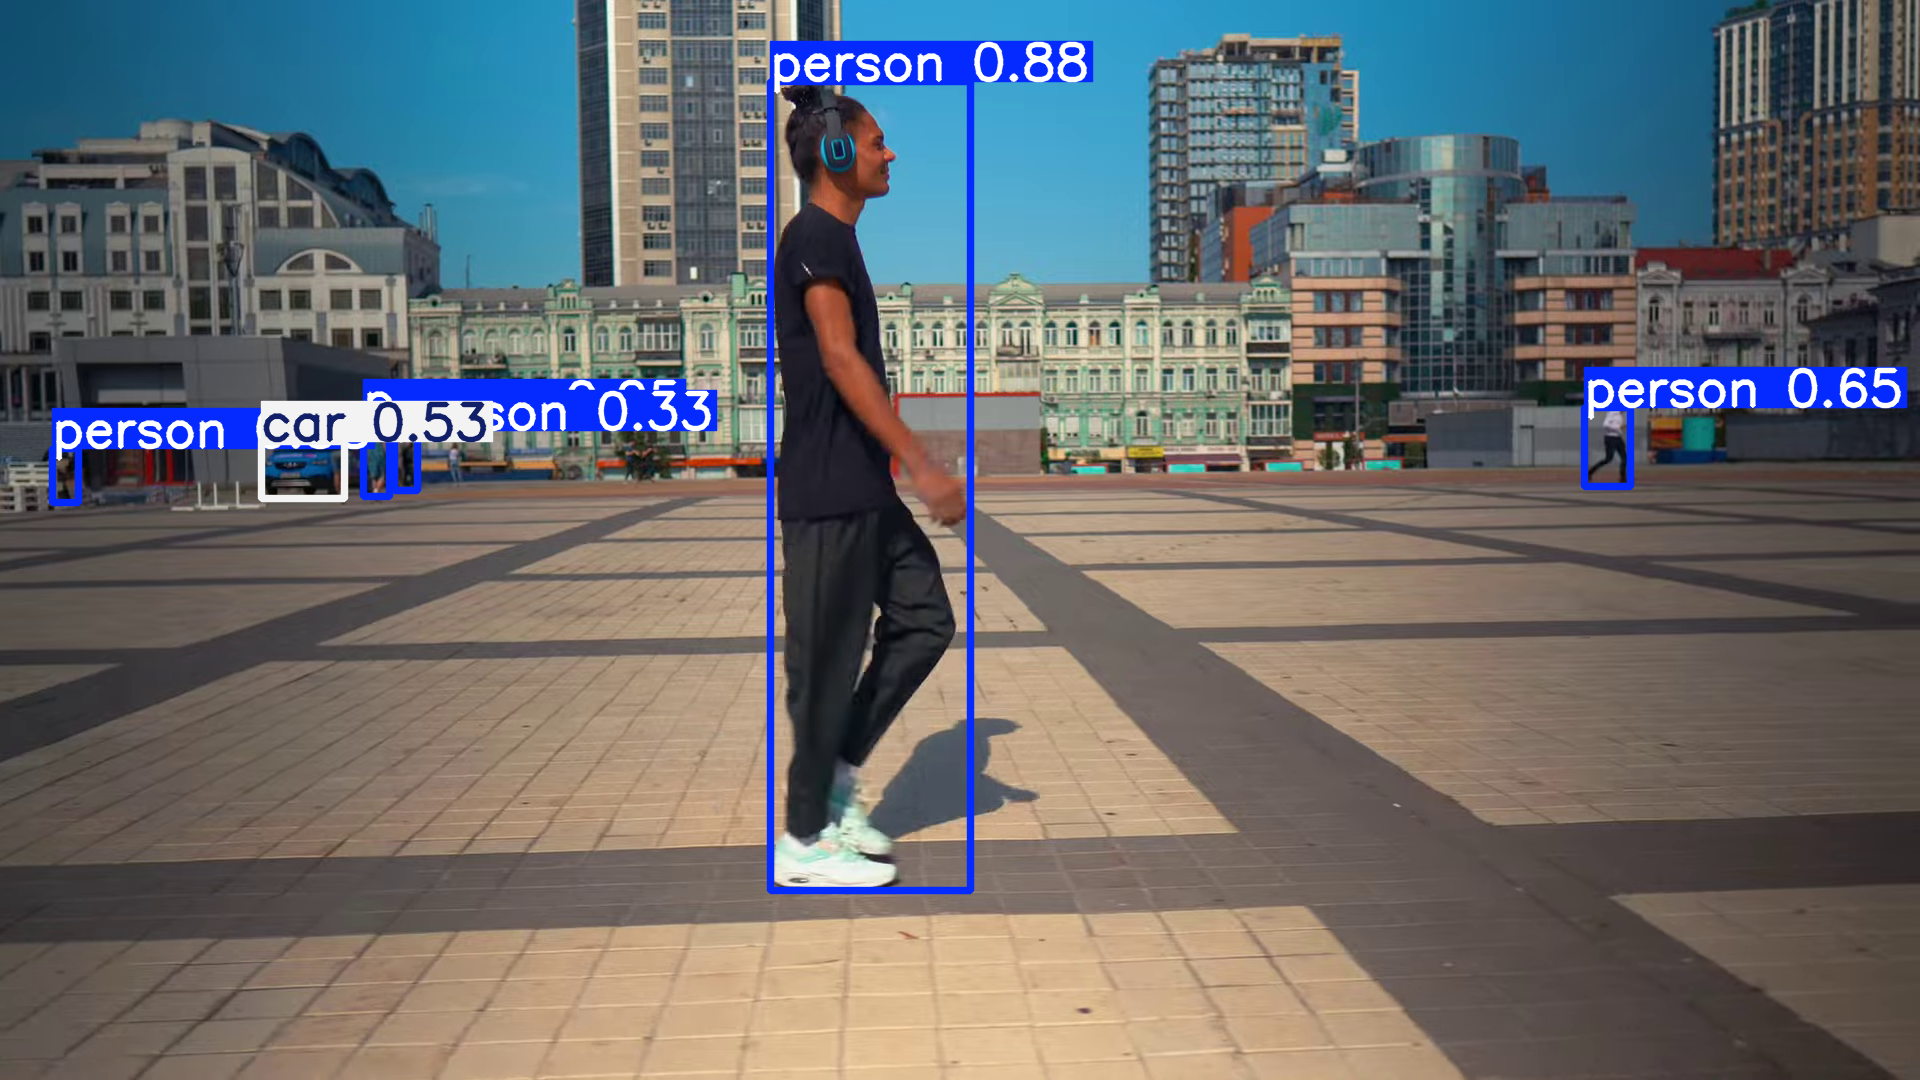

Przekroczono limit 10 sekund. Zatrzymanie przetwarzania.


In [8]:
# Model YOLO
model = YOLO('yolo11n.pt')

# Otwieranie wideo
cap = cv2.VideoCapture('testVideo.mp4')

if not cap.isOpened():
    print('Nie udało się otworzyć wideo.')
    exit()

# Ustawienie limitu czasowego dla pętli na potrzeby lab
start_time = time.time()

while cap.isOpened():
    if time.time() - start_time > 2:
        print('Przekroczono limit czasu.')
        break

    ret, frame = cap.read()
    if not ret:
        print('Nie udało się pobrać obrazu z wideo.')
        break

    # Predykcja modelu YOLO
    results = model.predict(frame)

    # Wizualizacja wyników
    annotated_frame = results[0].plot()
    cv2_imshow(annotated_frame)  # Wyświetlanie obrazu

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()